<a class="ancor" id="0-bullet"></a>
## Оглавление

* [Загрузка данных](#1-bullet)
* [Предобработка данных](#2-bullet)
  * [Корректировка типов](#3-bullet)
  * [Категоризация](#4-bullet)
  * [Дубликаты](#5-bullet)
  * [Аномальные значения](#6-bullet)
  * [Выводы](#7-bullet)
* [Исследовательский анализ данных](#8-bullet)
  * [Частота встречаемости городов](#9-bullet)
  * [Соотношение пользователей с подпиской и без](#10-bullet)
  * [Возраст пользователей](#11-bullet)
  * [Дистанция поездок](#12-bullet)
  * [Продолжительность поездок](#13-bullet)
  * [Cкорость поездок](#14-bullet)
  * [Выводы](#15-bullet)
* [Объединение данных](#16-bullet)
  * [Создание вспомогательных таблиц для пользователей с/без подписки](#17-bullet)
  * [Визуализация данных для пользователей с/без подписки](#18-bullet)
  * [Выводы](#19-bullet)
* [Подсчёт выручки](#20-bullet)
  * [Аггрегация данных по пользователям и месяцам](#21-bullet)
  * [Выводы](#22-bullet)
* [Проверка гипотез](#23-bullet)
  * [Влияние подписки на длительность поездки](#24-bullet)
  * [Дистанция поездок пользователей с подпиской](#25-bullet)
  * [Влияние подписки на выручку](#26-bullet)
  * [Влияние обновления серверов на количество обращений в поддержку](#27-bullet)
  * [Выводы](#28-bullet)
* [Общие выводы](#29-bullet)
* [Распределения](#30-bullet)
  * [Промокоды с беплатной подпиской](#31-bullet)
  * [Пуш-уведомления](#32-bullet)

In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

<a class="ancor" id="1-bullet"></a>
## Шаг 1. Загрузка данных

In [2]:
try:
    df_rides = pd.read_csv("/datasets/rides_go.csv")
    df_subs = pd.read_csv("/datasets/subscriptions_go.csv")
    df_users = pd.read_csv("/datasets/users_go.csv")
except FileNotFoundError:
    df_rides = pd.read_csv("../data/1_4_statistical_data_analysis_rides_go.csv")
    df_subs = pd.read_csv("../data/1_4_statistical_data_analysis_subscriptions_go.csv")
    df_users = pd.read_csv("../data/1_4_statistical_data_analysis_users_go.csv")

In [3]:
df_rides.sample(10, random_state=42)

,user_id,distance,duration,date
15095,1323,634.937500,8.523850,2021-02-28
200,21,3245.352628,14.211895,2021-03-19
5711,610,2838.943582,26.194718,2021-08-29
17585,1501,1258.242895,11.774729,2021-11-06
17762,1514,2540.135864,8.443148,2021-01-30
5426,580,2759.015171,14.882900,2021-02-27
13754,1228,4297.642168,28.835272,2021-02-22
1087,116,2853.695540,15.341546,2021-10-12
7220,750,3244.815615,14.489631,2021-07-14
14698,1294,4020.864462,19.062593,2021-11-04


In [ ]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
df_subs

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
df_users.sample(10, random_state=42)

,user_id,name,age,city,subscription_type
527,528,Степан,20,Екатеринбург,ultra
271,272,Любовь,21,Омск,ultra
1402,1403,Алёна,21,Омск,free
1201,1202,Ангелина,43,Москва,free
59,60,Алиса,19,Омск,ultra
1514,1515,Самир,22,Омск,free
438,439,Тимур,27,Краснодар,ultra
331,332,Василий,21,Тюмень,ultra
1084,1085,Глеб,24,Пятигорск,free
682,683,Лев,27,Сочи,ultra


In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### Выводы

Данные загрузились успешно.
Пропусков в данных не видно, особых проблем с данными тоже.

Данные загружены в 3 таблицы:
* df_rides - информация о поездках
* df_users - информация о пользователях
* df_subs - информация о подписках

[Оглавление](#0-bullet)

<a class="ancor" id="2-bullet"></a>
## Шаг 2. Предобработка данных

<a class="ancor" id="3-bullet"></a>

### Корректировка типов

In [8]:
df_rides["date"] = pd.to_datetime(df_rides["date"], format="%Y-%m-%d")
df_rides.sample(10, random_state=42)

,user_id,distance,duration,date
15095,1323,634.937500,8.523850,2021-02-28
200,21,3245.352628,14.211895,2021-03-19
5711,610,2838.943582,26.194718,2021-08-29
17585,1501,1258.242895,11.774729,2021-11-06
17762,1514,2540.135864,8.443148,2021-01-30
5426,580,2759.015171,14.882900,2021-02-27
13754,1228,4297.642168,28.835272,2021-02-22
1087,116,2853.695540,15.341546,2021-10-12
7220,750,3244.815615,14.489631,2021-07-14
14698,1294,4020.864462,19.062593,2021-11-04


<a class="ancor" id="4-bullet"></a>
### Категоризация

Добавим колонку с месяцем поездки

In [9]:
df_rides["month"] = df_rides["date"].dt.month_name()
df_rides["month"] = pd.Categorical(
    df_rides["month"],
    categories=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    ordered=True,
)
df_rides[["date", "month"]].sample(10, random_state=42)

,date,month
15095,2021-02-28,February
200,2021-03-19,March
5711,2021-08-29,August
17585,2021-11-06,November
17762,2021-01-30,January
5426,2021-02-27,February
13754,2021-02-22,February
1087,2021-10-12,October
7220,2021-07-14,July
14698,2021-11-04,November


In [10]:
df_rides["date"].describe()

count                            18068
mean     2021-06-30 19:47:21.266327296
min                2021-01-01 00:00:00
25%                2021-04-02 00:00:00
50%                2021-06-30 00:00:00
75%                2021-09-28 00:00:00
max                2021-12-30 00:00:00
Name: date, dtype: object

В датасете инфомрация только за один год, поэтому категорию лет выделять не будем.

Добавим еще сразу категории скорости в км/ч.

In [11]:
df_rides["speed"] = (df_rides["distance"] / 1000) / (df_rides["duration"] / 60)

Округлим скорости и длительности поездки до 2 знаков после запятой.

In [12]:
df_rides["distance"] = np.round(df_rides["distance"], 2)
df_rides["speed"] = np.round(df_rides["speed"], 2)
df_rides[["distance", "speed"]].sample(10, random_state=42)

,distance,speed
15095,634.94,4.47
200,3245.35,13.70
5711,2838.94,6.50
17585,1258.24,6.41
17762,2540.14,18.05
5426,2759.02,11.12
13754,4297.64,8.94
1087,2853.70,11.16
7220,3244.82,13.44
14698,4020.86,12.66


<a class="ancor" id="5-bullet"></a>
### Поиск и обработка дубликатов

Похоже, что потенциальные неявные дубликаты могут быть только в колонке города

In [13]:
df_users["city"].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Всё чисто, проверим еще явные дубликаты

In [14]:
display(df_rides.duplicated().sum())
df_users.duplicated().sum()

np.int64(0)

np.int64(31)

Ага, в пользователях есть немного неявных дубликатов, удалим их.

In [15]:
df_users = df_users.drop_duplicates().reset_index(drop=True)

<a class="ancor" id="6-bullet"></a>
### Поиск и отработка аномальных значений

In [ ]:
df_rides[["speed", "distance", "duration"]].describe()

,speed,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,13.785279,3070.659992,17.805011
std,44.156200,1116.831222,6.091051
min,0.010000,0.860000,0.500000
25%,8.130000,2543.227500,13.597563
50%,10.250000,3133.610000,17.678395
75%,12.930000,3776.220000,21.724800
max,865.320000,7211.010000,40.823963


Есть довольно странные значения скорости, надо посомтреть на них поподробнее.

In [17]:
df_rides.query("speed > 30")

,user_id,distance,duration,date,month,speed
6531,701,4196.45,0.5,2021-08-31,August,503.57
6570,704,4830.82,0.5,2021-10-14,October,579.70
6680,712,4684.00,0.5,2021-03-04,March,562.08
6695,713,5215.64,0.5,2021-02-25,February,625.88
6768,718,5197.44,0.5,2021-02-11,February,623.69
...,...,...,...,...,...,...
17004,1460,5531.34,0.5,2021-01-19,January,663.76
17242,1477,6724.93,0.5,2021-01-12,January,806.99
17314,1483,4445.48,0.5,2021-03-06,March,533.46
17505,1496,5722.55,0.5,2021-02-14,February,686.71


Случаев не так много, но во всех таких случаях длительность 30 секунд, что явно подозрительно. Удалим такие аномальные записи, и нужно бы сообщить команде сервиса, чтобы подумали, что за проблема может приводить именно к такому значению длительности.

In [18]:
df_rides.drop(df_rides.query("speed > 30").index, inplace=True)

<a class="ancor" id="7-bullet"></a>
### Выводы

Была проведена предобработка данных:
* Корректировка типов:
  * Установлен корректный формат даты в таблице df_rides
* Категоризация. Добавлены столбцы:
  * month - месяц совершения поездки
  * speed - км/ч, средняя скорость поездки
* Дубликаты:
  * Найдены явные дубликаты (31) в таблице df_users. Дубликаты удалены.
  * Неявные дубликаты не обнаружены.
* Аномальные значения:
  * Анализ средней скорости выявил наличие аномальных значений. Таких случаев не так много (95), но во всех таких случаях длительность поездки 30 секунд, что явно подозрительно. Нужно уточнить у команды сервиса с чем может быть связана подобная проблема. Все 95 записей были удалены.

[Оглавление](#0-bullet)

<a class="ancor" id="8-bullet"></a>
## Шаг 3. Исследовательский анализ данных

<a class="ancor" id="9-bullet"></a>
### Частота встречаемости городов

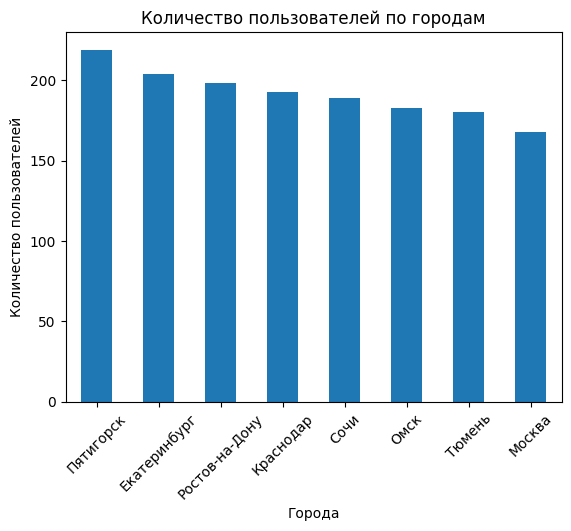

In [19]:
_ = df_users["city"].value_counts().plot(
    kind="bar",
    title="Количество пользователей по городам",
    xlabel="Города",
    ylabel="Количество пользователей",
    rot=45,
)

В целом пользователи довольно равномерно распределены по городам.

На удивление в Москве пользователей меньше всего.

<a class="ancor" id="10-bullet"></a>
### Соотношение пользователей с подпиской и без подписки

subscription_type
free     0.544329
ultra    0.455671
Name: proportion, dtype: float64

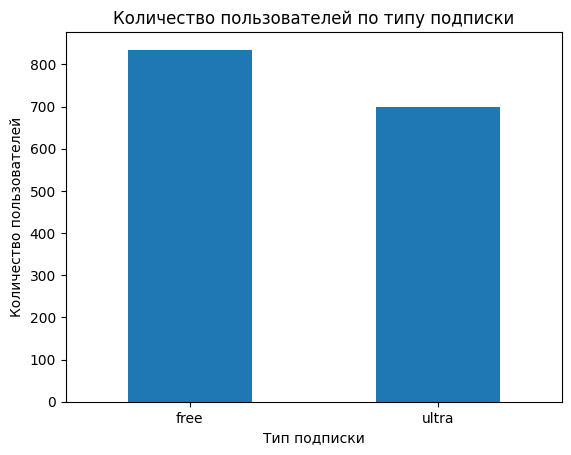

In [20]:
df_users["subscription_type"].value_counts().plot(
    kind="bar",
    title="Количество пользователей по типу подписки",
    xlabel="Тип подписки",
    ylabel="Количество пользователей",
    rot=0,
)
df_users["subscription_type"].value_counts(normalize=True)

Пользователей с подпиской чуть меньше, но не кардинально.

<a class="ancor" id="11-bullet"></a>
### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

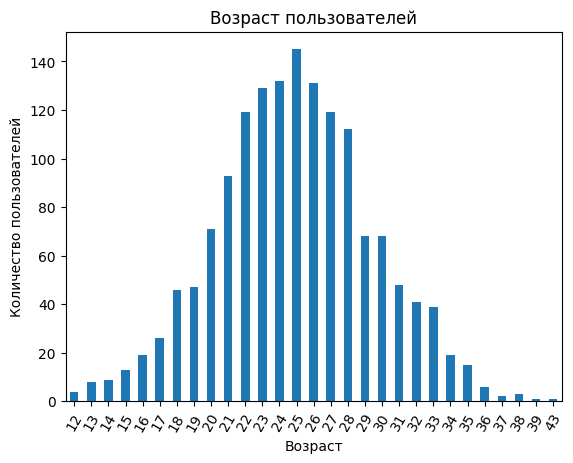

In [21]:
df_users["age"].value_counts().sort_index().plot(
    kind="bar",
    title="Возраст пользователей",
    xlabel="Возраст",
    ylabel="Количество пользователей",
    rot=60,
)
df_users["age"].describe()

Распределение возраста пользователей близко к нормальному со средним значением 25 и СО 4.6.

P.S. А что, у нас в 2021 году можно было кататься на электросамокатах несовершеннолетним?

<a class="ancor" id="12-bullet"></a>
### Дистанция поездок

count    17973.000000
mean      3059.863849
std       1108.814623
min          0.860000
25%       2538.840000
50%       3129.030000
75%       3762.640000
max       7066.000000
Name: distance, dtype: float64

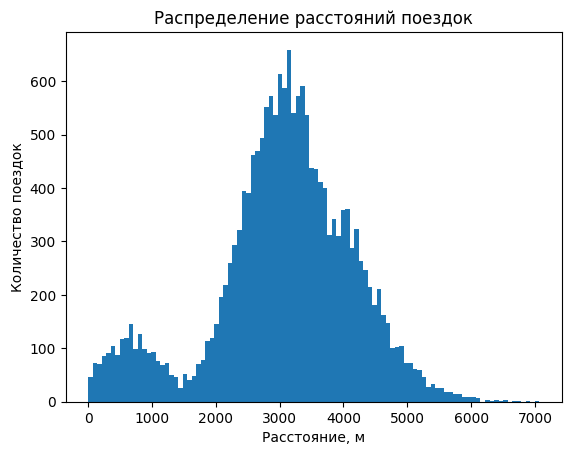

In [22]:
df_rides["distance"].plot(
    kind="hist",
    bins=100,
    title="Распределение расстояний поездок",
    xlabel="Расстояние, м",
    ylabel="Количество поездок",
)
df_rides["distance"].describe()

В распределении проезжаемых расстояний не всё так просто. Явно выделяются 2 пика со средними значениями около 700 м и 3100, также есть подозрение, что возможно там еще подмешено распределние со средним около 4 км.

В целом медианное расстояние 3130 м.

Попробуем поискать какую-то простую причину такого распределения расстояний.

Попробуе посмотреть на распределения дистанций по городам, месяцам, возрасту и типу подписки.

In [23]:
df = df_rides.merge(df_users, on="user_id", how="left")

In [24]:
def plot_histograms(
    df: pd.DataFrame,
    category: str,
    data_col: str,
    bins: int = 100,
    ncols: int = 4,
    title: str = "",
    ylabel: str = "",
    xfigsize: int = 3,
    yfigsize: int = 3,
    sharex: bool = False,
    sharey: bool = True,
) -> None:
    """
    Функция для построения гистограмм по категориям.

    parameters
    ----------
    df : pd.DataFrame
        Датафрейм с данными.
    category : str
        Название колонки с категориями.
    data_col : str
        Название колонки с данными для построения гистограммы.
    bins : int
        Количество бинов для гистограммы.
    ncols : int
        Количество колонок в графике.
    """

    nrows = math.ceil(len(df[category].unique()) / ncols)

    fig, axs = plt.subplots(
        nrows,
        ncols,
        figsize=(xfigsize * ncols, yfigsize * nrows),
        sharey=sharey,
        sharex=sharex,
    )
    axs = axs.flatten()

    for i, col in enumerate(df[category].unique()):
        df[df[category] == col].plot(
            kind="hist",
            y=data_col,
            ax=axs[i],
            grid=True,
            bins=bins,
            xlabel=col,
            ylabel=ylabel,
        )
    fig.suptitle(title)
    fig.tight_layout()

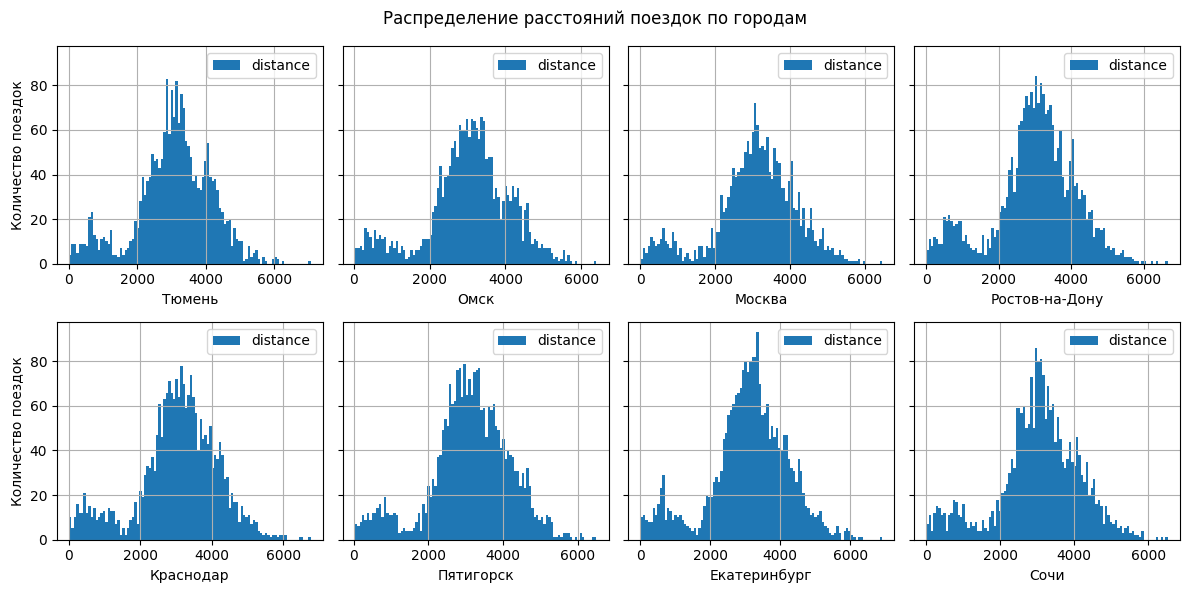

In [25]:
plot_histograms(
    df,
    category="city",
    data_col="distance",
    title="Распределение расстояний поездок по городам",
    ylabel="Количество поездок",
)

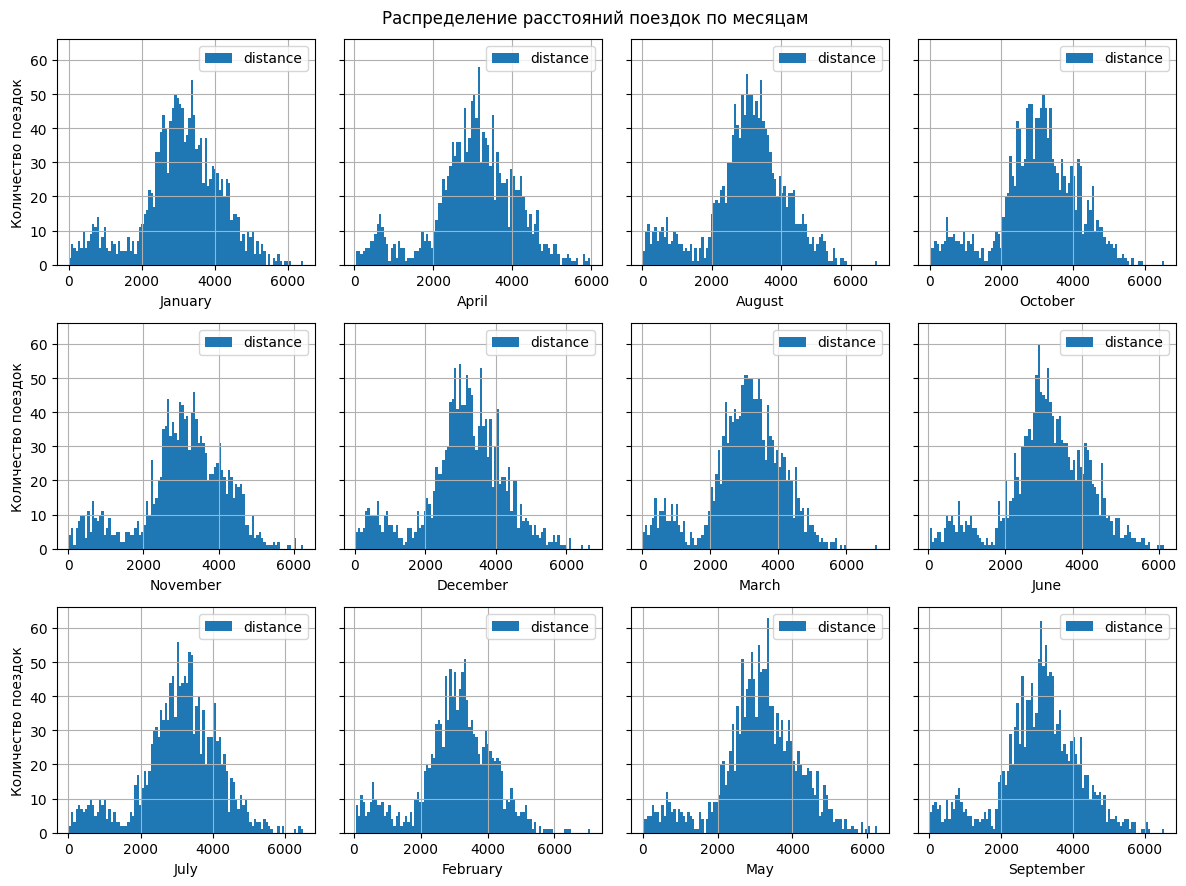

In [26]:
plot_histograms(
    df,
    category="month",
    data_col="distance",
    title="Распределение расстояний поездок по месяцам",
    ylabel="Количество поездок",
)

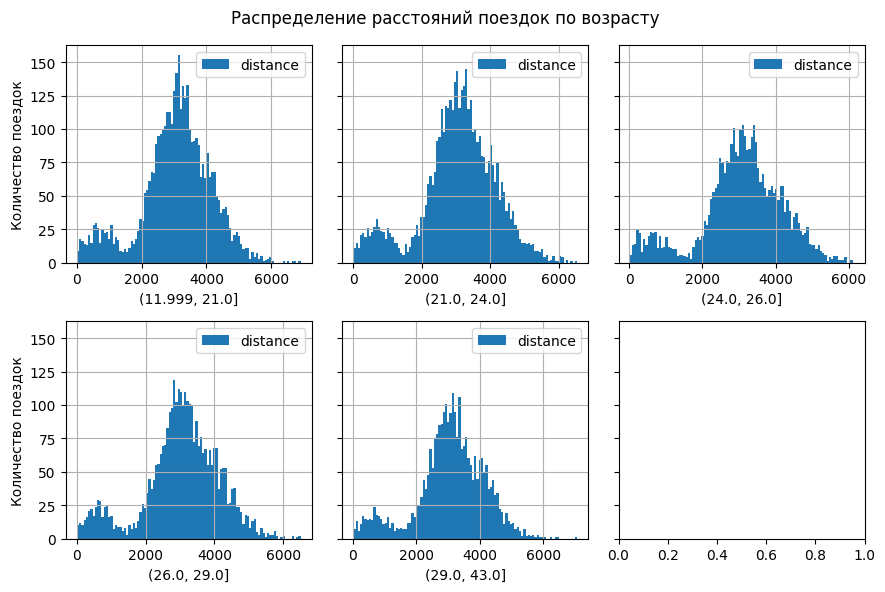

In [27]:
plot_histograms(
    df.assign(age_cat=pd.qcut(df["age"], q=5)).sort_values(by="age_cat"),
    category="age_cat",
    data_col="distance",
    title="Распределение расстояний поездок по возрасту",
    ncols=3,
    ylabel="Количество поездок",
)

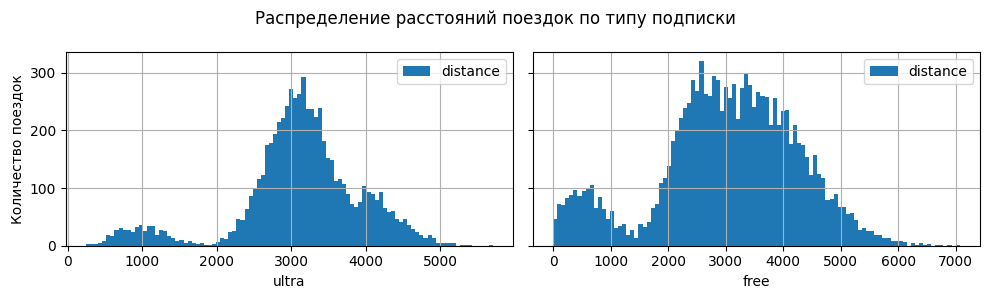

In [28]:
plot_histograms(
    df,
    category="subscription_type",
    data_col="distance",
    ncols=2,
    title="Распределение расстояний поездок по типу подписки",
    ylabel="Количество поездок",
    xfigsize=5,
    yfigsize=3,
)

Простых причин такого возникновения такого распределения не просматривается. Распределение дистанция явно не зависит ни от города, ни от месяца, ни от возраста. Просматривается некоторая зависимость от типа подписки, но с этим мы разберёмся позднее.

Посмотрим еще как распределены скорости для этих коротких поездок.

<Axes: title={'center': 'Распределение скорости поездок'}, xlabel='Скорость, км/ч', ylabel='Количество поездок'>

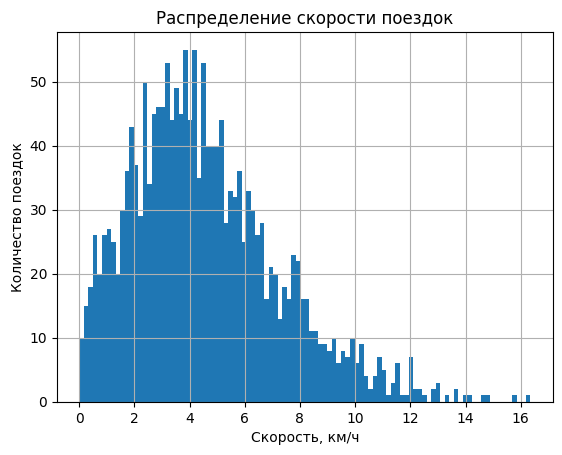

In [29]:
df.query("distance < 1500")["speed"].plot(
    kind="hist",
    bins=100,
    title="Распределение скорости поездок",
    xlabel="Скорость, км/ч",
    ylabel="Количество поездок",
    grid=True,
)

Ага, в большинстве случаев скорости близки к скорости пешехода.

Можно сделать предположение, что эти "короткие" поездки связаны с тем, что что вместе с человеком, который взял самокат есть еще один или несколько человек и они просто движутся вместе. На имеющихся данных это предположение нельзя ни подтвердить ни опровергнуть, но оно хоть как-то может объяснить наличие этого аномального пика в распределении дистанций поездок.

<a class="ancor" id="13-bullet"></a>
### Продолжительность поездок

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

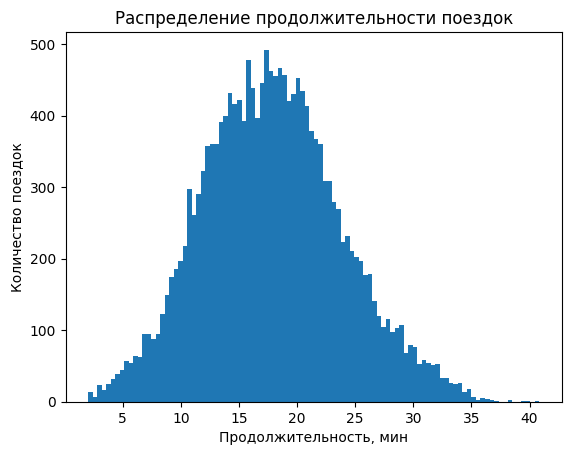

In [30]:
df_rides["duration"].plot(
    kind="hist",
    bins=100,
    title="Распределение продолжительности поездок",
    xlabel="Продолжительность, мин",
    ylabel="Количество поездок",
)
df_rides["duration"].describe()

С распределнием длительности поездок при этом ничего необычного нет. Распределние близко к номарльному. Среднее значение близко к 18 минутам, СО около 6.

<a class="ancor" id="14-bullet"></a>
### Скорость поездок
Интересно посмотреть как ведём себя при этом распределение средних скоростей.

count    17973.000000
mean        10.614932
std          3.965202
min          0.010000
25%          8.110000
50%         10.230000
75%         12.870000
max         25.390000
Name: speed, dtype: float64

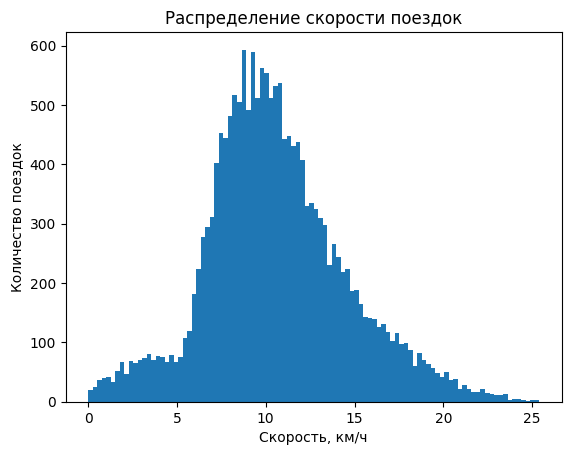

In [31]:
df_rides["speed"].plot(
    kind="hist",
    bins=100,
    title="Распределение скорости поездок",
    xlabel="Скорость, км/ч",
    ylabel="Количество поездок",
)
df_rides["speed"].describe()

Распределние явно далеко от нормального. медианное значение около 10 км/ч.

<a class="ancor" id="15-bullet"></a>
### Выводы

Был проведён исследовательский анализ данных:
* Изучение распределения пользователей по городам показало, что пользователи в выборке довольно равномерно распределены по городам.
* Пользователи с подпиской составляют примерно 45% всех пользователей.
* Распределение возраста пользователей близко к нормальному со средним значением 25 и СО 4.6.
* В распределении проезжаемых расстояний выделяются 2 пика со средними значениями около 700 м и 3100. В целом медианное расстояние 3130 м.

    Были изучены распределения дистанций поездок при группировках по городам, месяцам, возрасту и типу подписки. Распределение дистанция явно не зависит ни от города, ни от месяца, ни от возраста. Просматривается некоторая зависимость от типа подписки.

    Анализ средней скорости для "коротких" поездок показал, что в большинстве случаев скорости близки к скорости пешехода. Можно сделать предположение, что эти "короткие" поездки связаны с тем, что что вместе с человеком, который взял самокат есть еще один или несколько человек и они просто движутся вместе. На имеющихся данных это предположение нельзя ни подтвердить ни опровергнуть, но оно хоть как-то может объяснить наличие этого аномального пика в распределении дистанций поездок.
* Распределние длительностей поездок близко к номарльному. Среднее значение около 18 минут, СО около 6.
* Медианное значение средних скоростей поездок 10 км/ч.

[Оглавление](#0-bullet)

<a class="ancor" id="16-bullet"></a>
## Шаг 4. Объединение данных

Данные по поездкам и пользователям мы уже объединили в одну таблицу на предыдущем шаге.

Добавим сюда еще данные по подписке.

In [32]:
df = df.merge(df_subs, on="subscription_type", how="left")
df[
    ["subscription_type", "minute_price", "start_ride_price", "subscription_fee"]
].sample(10, random_state=42)

,subscription_type,minute_price,start_ride_price,subscription_fee
11945,free,8,50,0
3295,ultra,6,0,199
15663,free,8,50,0
7516,free,8,50,0
13781,free,8,50,0
16649,free,8,50,0
2519,ultra,6,0,199
361,ultra,6,0,199
3752,ultra,6,0,199
10540,free,8,50,0


Добавим еще столбец стоимости поездки

In [33]:
df["revenue"] = np.ceil(df["duration"]) * df["minute_price"] + df["start_ride_price"]
df[["duration", "minute_price", "start_ride_price", "revenue"]].sample(
    10, random_state=42
)

,duration,minute_price,start_ride_price,revenue
11945,13.399159,8,50,162.0
3295,15.163058,6,0,96.0
15663,17.587383,8,50,194.0
7516,23.047149,8,50,242.0
13781,21.528226,8,50,226.0
16649,15.070875,8,50,178.0
2519,20.864951,6,0,126.0
361,25.455758,6,0,156.0
3752,28.363148,6,0,174.0
10540,12.628843,8,50,154.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  category      
 5   speed              17973 non-null  float64       
 6   name               17973 non-null  object        
 7   age                17973 non-null  int64         
 8   city               17973 non-null  object        
 9   subscription_type  17973 non-null  object        
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
 13  revenue            17973 non-null  float64       
dtypes: cat

<a class="ancor" id="17-bullet"></a>
### Создание вспомогательных датафреймов (с/без подписки)

In [35]:
df_free = df.query('subscription_type == "free"')
df_ultra = df.query('subscription_type == "ultra"')

<a class="ancor" id="18-bullet"></a>
### Визуализация данных о расстоянии и времени для различных категорий пользователей

,count,mean,std,min,25%,50%,75%,max
subscription_type,,,,,,,,
free,11473.0,17.530771,6.162609,2.035632,13.085688,17.383807,21.638038,34.948498
ultra,6500.0,18.541985,5.572048,3.760353,14.524654,18.178153,21.884129,40.823963


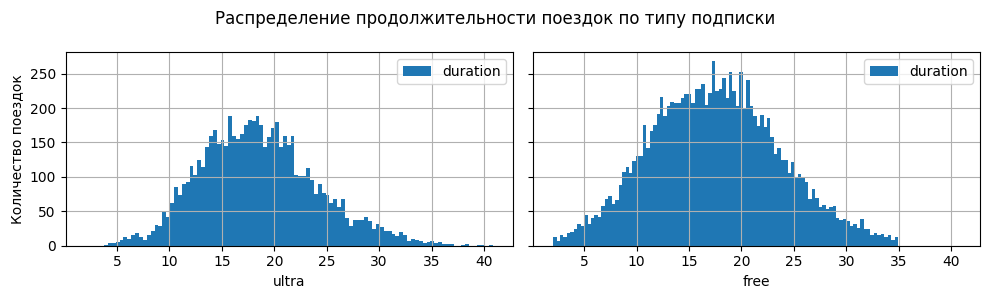

In [36]:
plot_histograms(
    df,
    category="subscription_type",
    data_col="duration",
    ncols=2,
    title="Распределение продолжительности поездок по типу подписки",
    ylabel="Количество поездок",
    xfigsize=5,
    yfigsize=3,
    sharex=True,
)
df.groupby("subscription_type")["duration"].describe()

На первый взгляд распределния длительностей поездок для обоих категорий выглядят довольно похоже...

,count,mean,std,min,25%,50%,75%,max
subscription_type,,,,,,,,
free,11473.0,3028.374240,1235.541051,0.86,2360.8800,3102.08,3883.9800,7066.00
ultra,6500.0,3115.445431,836.895369,244.21,2785.4475,3148.64,3560.5775,5699.77


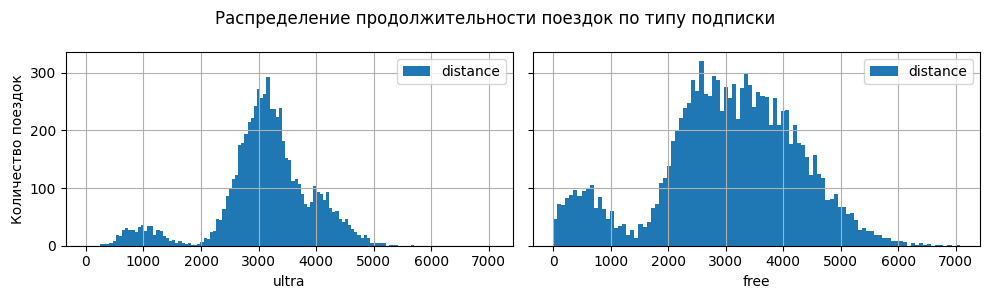

In [37]:
plot_histograms(
    df,
    category="subscription_type",
    data_col="distance",
    ncols=2,
    title="Распределение продолжительности поездок по типу подписки",
    ylabel="Количество поездок",
    xfigsize=5,
    yfigsize=3,
    sharex=True,
)
df.groupby("subscription_type")["distance"].describe()

У пользователей с беслпатной подпиской выше вариатвность проезжаемых расстояний, кроме того, для них распределение "коротких" поездок сосредоточено около 600 метров, тогда как для платных подписчиков прослеживается более чётко выраженный пик около 3100 метров с дополнительным пиком на 4000 метров, а пик "коротких" поездок сосредоточен около 1 км.

<a class="ancor" id="19-bullet"></a>
### Выводы

Данные всех таблиц были сведены в одну таблицу (df).

В эту таблицу был добавлен столбец со стоимостью поездки (revenue).

Созданы две вспомогательные таблицы, включающие данных о поездках пользователей с подпиской (df_ultra) и без подписки (df_free).

Был произведён анализ  распределения проезжаемхы расстояний и длительностей поездок для этих двух категорий пользователей:
* Визуально распределния длительностей поездок для обоих категорий выглядят довольно похоже.
* У пользователей с беслпатной подпиской выше вариатвность проезжаемых расстояний, кроме того, для них распределение "коротких" поездок сосредоточено около 600 метров, тогда как для платных подписчиков прослеживается более чётко выраженный пик около 3100 метров с дополнительным пиком на 4000 метров, а пик "коротких" поездок сосредоточен около 1 км.

[Оглавление](#0-bullet)

<a class="ancor" id="20-bullet"></a>
## Шаг 5. Подсчёт выручки

<a class="ancor" id="21-bullet"></a>
### Аггрегация данных по пользователям - суммарное расстояние, длительность, количество поездок и выручка за каждый месяц

In [38]:
df_ultra_rides = df_ultra.groupby(["user_id", "month"], observed=False).agg(
    tot_duration=("duration", "sum"),
    tot_distance=("distance", "sum"),
    rides_num=("duration", "count"),
    revenue=("revenue", "sum"),
)
# Добавляем к выручке ежемесячную стоимость подписки
df_ultra_rides["revenue"] += df_ultra["subscription_fee"][0]
df_ultra_rides.sample(10, random_state=42)

,,tot_duration,tot_distance,rides_num,revenue
user_id,month,,,,
409,August,15.541155,2703.33,1,295.0
106,February,0.000000,0.00,0,199.0
329,October,0.000000,0.00,0,199.0
207,December,35.748482,6674.21,2,421.0
225,October,26.437338,3859.33,1,361.0
221,July,0.000000,0.00,0,199.0
44,March,0.000000,0.00,0,199.0
3,October,0.000000,0.00,0,199.0
376,September,14.944061,3310.03,1,289.0


In [39]:
df_free_rides = df_free.groupby(["user_id", "month"], observed=False).agg(
    tot_duration=("duration", "sum"),
    tot_distance=("distance", "sum"),
    rides_num=("duration", "count"),
    revenue=("revenue", "sum"),
)
df_free_rides.sample(10, random_state=42)

,,tot_duration,tot_distance,rides_num,revenue
user_id,month,,,,
1484,December,17.846286,3792.37,1,194.0
1430,September,57.306798,9307.53,2,564.0
1338,January,32.093389,5269.45,2,364.0
734,September,32.447782,2449.90,2,364.0
1009,March,11.916993,2859.88,1,146.0
1098,July,14.768855,3158.80,1,170.0
1041,March,17.162854,2604.67,1,194.0
1329,April,84.984517,12699.94,5,946.0
1344,August,0.000000,0.00,0,0.0


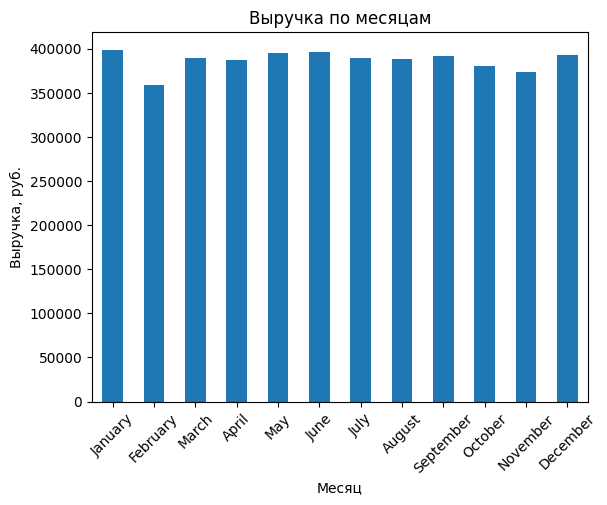

In [40]:
_ = (
    df_ultra_rides.groupby("month", observed=False)["revenue"].sum()
    + df_free_rides.groupby("month", observed=False)["revenue"].sum()
).plot(
    kind="bar",
    title="Выручка по месяцам",
    xlabel="Месяц",
    ylabel="Выручка, руб.",
    rot=45,
)

Удивительное дело: в 4 из 9 городов, представленных в выборке на самокатах зимой точно ездить нельзя, а выручка при этом зимой не особо проседает, наоборот самая большая выручка за явнарь...

<a class="ancor" id="22-bullet"></a>
### Выводы

Созданы еще 2 вспомогательные таблицы, содержащие суммарное расстояние, длительность, количество поездок и приносимую сервису выручку по месяцам, для пользователей с подпиской (df_ultra_rides) и пользователей без подписки (df_free_rides).

Кажется при этом несколько подозрительным равномерное распределение выручки по месяцам.

[Оглавление](#0-bullet)

<a class="ancor" id="23-bullet"></a>
## Шаг 6. Проверка гипотез

<a class="ancor" id="24-bullet"></a>
### Влияние подписки на длительность поездки

Нуль-гипотеза: средняя длительность поездок для пользователей с подпиской и без подписки одинакова.

Альтернативная гипотеза: средняя длительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.

In [41]:
# Размеры выборок несколько различны, поэтому поставим параметр equal_var=False, хотя на результат это не повлияет
result = stats.ttest_ind(
    df_free["duration"], df_ultra["duration"], equal_var=False, alternative="less"
)
result.pvalue

np.float64(1.6162210195311066e-29)

p-value очень мало. Нуль-гипотезу стоит отвергнуть в пользу альтернативной гипотезы: средняя длительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.

<a class="ancor" id="25-bullet"></a>
### Дистанция за одну поездку для пользователей с подпиской по отношению к оптимальной (3130 м)

Нуль-гипотеза: Средняя дистанция, проезжаемая пользователями с подпиской за один сеанс равна 3130 метров.

Альтернативная гипотеза: Средняя средняя дистанция, проезжаемая пользователями с подпиской за один сеанс меньше 3130 метров.

In [42]:
result = stats.ttest_1samp(df_ultra["distance"], 3130, alternative="less")
result.pvalue

np.float64(0.0804637394157586)

p-value достаточно велико (0.08), данные не дают оснований отвергнуть нуль-гипотезу: Средняя дистанция, проезжаемая пользователями с подпиской за один сеанс равна 3130 метров.

<a class="ancor" id="26-bullet"></a>
### Влияние подписки на выручку

Нуль-гипотеза: среднее значение среднемесячной выручки для пользователей с подпиской равна среднему значению среднемесячной выручки пользователей без подписки.

Альтернативная гипотеза: среднее значение среднемесяной выручки пользователей с подпиской выше, чем среднее значение среднемесячной выручки пользователей без подписки. 

In [43]:
ultra_rev_per_user = df_ultra_rides.groupby(level="user_id", observed=False)[
    "revenue"
].mean()
free_rev_per_user = df_free_rides.groupby(level="user_id", observed=False)[
    "revenue"
].mean()
result = stats.ttest_ind(
    ultra_rev_per_user,
    free_rev_per_user,
    equal_var=False,
    alternative="greater",
)
print(
    f"Средняя среднемесячная выручка по подписке Ultra: {ultra_rev_per_user.mean():.1f} руб."
)
print(
    f"Средняя среднемесячная выручка по подписке Free: {free_rev_per_user.mean():.1f} руб."
)
print(f"p-value={result.pvalue}")

Средняя среднемесячная выручка по подписке Ultra: 287.5 руб.
Средняя среднемесячная выручка по подписке Free: 222.4 руб.
p-value=8.415959094821155e-125


p-value очень мало, нуль-гипотезу стоит отвергнуть в пользу альтернативной гипотезы: среднее значение среднемесяной выручки пользователей с подпиской выше, чем среднее значение среднемесячной выручки пользователей без подписки.

<a class="ancor" id="27-bullet"></a>
### Влияние обновления серверов на количество обращений в поддержку

Для исследования влияния обновления на количество обновлений в тех поддержку нужно воспользоваться функцией ttest_rel(before_upd, after_upd, alternative='greater') из модуля stats пакета scipy. Массивы before_upd и after_upd должны содержать количества обращений в техподдержку одних и тех же пользователей (в одном и том же порядке) за одинаковый промежуток времени до и после обновления. Нуль-гипотеза при этом можно сформулировать следующим образом: среднее количество обращений в техподдержку до и после обновления равны. Альтернативная гипотеза: среднее количество обновлений в тех поддержку после обновления уменьшилось.

<a class="ancor" id="28-bullet"></a>
### Выводы

Был изучен ряд гипотез касательно влияния подписки на аренду самокатов:
1. С высокой степенью достоверности (p-value ~ e-29) можно утверждать, что средняя длительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.
2. Данные не позволяют утверждать (p-value ~ 0.08), что средняя дистанция, проезжаемая пользователями с подпиской за один сеанс не превышает.
3. С высокой степенью достоверности (p-value ~ e-125) можно утверждать, что среднее значение среднемесяной выручки пользователей с подпиской выше, чем среднее значение среднемесячной выручки пользователей без подписки.

[Оглавление](#0-bullet)

<a class="ancor" id="29-bullet"></a>
## Общие выводы

Была проведена предобработка данных:
* Корректировка типов:
  * Установлен корректный формат даты в таблице df_rides
* Категоризация. Добавлены столбцы:
  * month - месяц совершения поездки
  * speed - км/ч, средняя скорость поездки
* Дубликаты:
  * Найдены явные дубликаты (31) в таблице df_users. Дубликаты удалены.
  * Неявные дубликаты не обнаружены.
* Аномальные значения:
  * Анализ средней скорости выявил наличие аномальных значений. Таких случаев не так много (95), но во всех таких случаях длительность поездки 30 секунд, что явно подозрительно. Нужно уточнить у команды сервиса с чем может быть связана подобная проблема. Все 95 записей были удалены.

Был проведён исследовательский анализ данных:
* Изучение распределения пользователей по городам показало, что пользователи в выборке равномерно распределены по городам.
* Пользователи с подпиской составляют примерно 45% всех пользователей.
* Распределение возраста пользователей близко к нормальному со средним значением 25 и СО 4.6.
* В распределении проезжаемых расстояний выделяются 2 пика со средними значениями около 700 м и 3100. В целом медианное расстояние 3130 м.

    Были изучены распределения дистанций поездок при группировках по городам, месяцам, возрасту и типу подписки. Распределение дистанция явно не зависит ни от города, ни от месяца, ни от возраста. Просматривается некоторая зависимость от типа подписки.

    Анализ средней скорости для "коротких" поездок показал, что в большинстве случаев скорости близки к скорости пешехода. Можно сделать предположение, что эти "короткие" поездки связаны с тем, что что вместе с человеком, который взял самокат есть еще один или несколько человек и они просто движутся вместе. На имеющихся данных это предположение нельзя ни подтвердить ни опровергнуть, но оно хоть как-то может объяснить наличие этого аномального пика в распределении дистанций поездок.
* Распределние длительностей поездок близко к номарльному. Среднее значение около 18 минут, СО около 6.
* Медианное значение средних скоростей поездок 10 км/ч.
* Был произведён анализ  распределения проезжаемхы расстояний и длительностей поездок для пользователей с подпиской и без:
  * Визуально распределния длительностей поездок для обоих категорий выглядят довольно похоже.
  * У пользователей с беслпатной подпиской выше вариатвность проезжаемых расстояний, кроме того, для них распределение "коротких" поездок сосредоточено около 600 метров, тогда как для платных подписчиков прослеживается более чётко выраженный пик около 3100 метров с дополнительным пиком на 4000 метров, а пик "коротких" поездок сосредоточен около 1 км.

**Портрет средней поездки**
Длительность 18 минут, дистанция 3.1 км, скорость 10 км/ч.

**Портрет среднего пользователя**
25 лет, имеет платную подписку с вероятностью около 45%. При наличии подписки приносит ежемесячную выручку около 287 руб, без подписки 222 руб.

Был изучен ряд гипотез касательно влияния подписки на аренду самокатов:
1. С высокой степенью достоверности (p-value ~ e-29) можно утверждать, что средняя длительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.
2. Данные не позволяют утверждать (p-value ~ 0.08), что средняя дистанция, проезжаемая пользователями с подпиской за один сеанс не превышает.
3. С высокой степенью достоверности (p-value ~ e-125) можно утверждать, что среднее значение среднемесяной выручки пользователей с подпиской выше, чем среднее значение среднемесячной выручки пользователей без подписки.

В целом, стремление увеличить количество пользователей с подпиской выглядит обоснованным.

**Рекомендации**
* Анализ выручки показал, что она примерно равномерно распределена по месяцам, причём  в 4 из 9 городов, представленных в выборке на самокатах зимой точно ездить нельзя, а выручка при этом зимой не особо проседает, наоборот самая большая выручка за явнарь. Возможно в данных есть какая-то проблема.
* Часть данных о поездках содержит явно некорректную длительность поездок (0.5 минуты), возможно стоит поискать причину возникновения этой проблемы.

[Оглавление](#0-bullet)

<a class="ancor" id="30-bullet"></a>
## Шаг 7. Распределения

<a class="ancor" id="31-bullet"></a>
### Промокоды с бесплатной подпиской

**Формулировка задания**

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

**Решение**

Предположим, что решения о продлении подписки пользователи принимают независимо друг от друга. У нас получается классическая схема испытаний Бернулли с вероятностью успеха p=0.1. Распределение успехов будет описываться биномиальным распределением. Биномиальное распределение задаётся вероятностью успеха *p* и общим количеством испытаний *n*. Нам нужно найти такое *n*, что вероятность получить менее 100 успехов составит менее 5%.

Попробуем получить разумную оценку *n*. Шанс успеха довольно большой, а количество испытаний у нас явно будет значительно больше 100, поэтому искомое биномиальное распределение можно аппроксимировать нормальным со средним *np* и СО (np(1-p))**0.5. Вероятность отклониться от нормального распределения более, чем на 2 СО составляет менее 2.5 %, поэтому в качестве грубой оценки *n* можно составить следующее уравнение:

$$np - 2\sqrt{(np(1-p))} = 100$$

Преобразуем его к виду квадратного уравнения
$$p^2n^2 -(200p + 4p(1-p))n + 10000 = 0 $$

Найдём корни этого уравнения.

In [44]:
from numpy.polynomial import Polynomial

p = 0.1
poly = Polynomial([10_000, -(200 * p + 4 * p * (1 - p)), p**2])
root1, root2 = poly.roots()
print(root1, root2)

827.4114379087773 1208.5885620912222


Первый из этих корней соответствует ситуации, когда с вероятность 97.7% у нас будет меньше 100 положительных исходов, поэтому нас интересует второй корень. Проверим это.

In [45]:
binom = stats.binom(int(root2), p)
binom.cdf(99)

np.float64(0.01842778665646817)

Отлично! Мы уже довольно близки, давайте найдем минимальное количество испытаний, при котором вероятность получить менее 100 положительных исходов всё еще будет менее 95%.

In [46]:
n = int(root2)
while stats.binom.cdf(99, n, p) < 0.05:
    n -= 1
result = n + 1
result

1161

Построим графики распределения

Text(0.5, 1.0, 'Распределение вероятностей продления подписок')

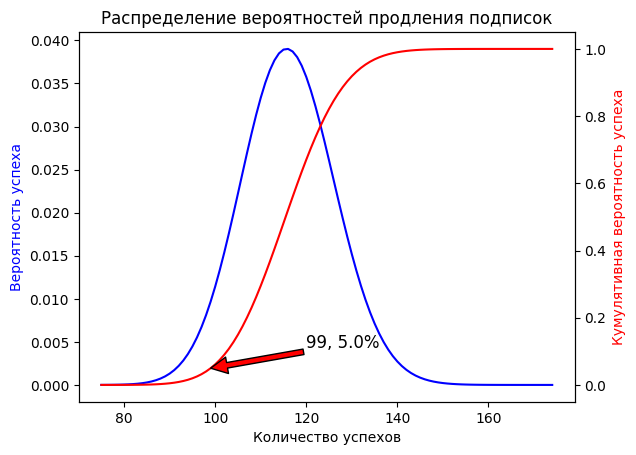

In [47]:
ax = plt.subplot()
x = np.arange(75, 175)
ax.plot(x, stats.binom.pmf(x, result, p), color="blue")
ax.set_ylabel("Вероятность успеха", color="blue")
ax.set_xlabel("Количество успехов")
ax2 = ax.twinx()
ax2.plot(x, stats.binom.cdf(x, result, p), color="red")
ax2.set_ylabel("Кумулятивная вероятность успеха", color="red")
ax2.annotate(
    f"99, {stats.binom.cdf(99, result, p)*100:.1f}%",
    xy=(99, stats.binom.cdf(99, result, p)),
    xytext=(120, 0.1),
    arrowprops=dict(facecolor="red"),
    fontsize=12,
    horizontalalignment="left",
    verticalalignment="bottom",
)
ax.set_title("Распределение вероятностей продления подписок")

**Вывод**

Нужно разослать около 1160 промокодов

<a class="ancor" id="32-bullet"></a>
### Пуш-уведомления

**Задание**

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

**Решение**
У нас опять опять схема Бернулли и порождаемое ей биномиальное распределение. Вероятность успеха еще ближе к 0.5 и общее количество испытаний здесь очень большое, поэтому опять можно аппроксимировать биномиальное распределение нормальным с параметрами.
$$\mu=np=1000000*0.4=400000$$ 
$$\sigma=\sqrt{np(1-p)}=\sqrt{1000000*0.4*0.6}\approx490$$ 

In [48]:
n = 1_000_000
p = 0.4

push_distr = stats.norm(n * p, math.sqrt(n * p * (1 - p)))
print(
    f"Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей {push_distr.cdf(399_500)*100:.1f}%"
)

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей 15.4%


Text(0.5, 1.0, 'Распределение вероятностей открытия уведомлений')

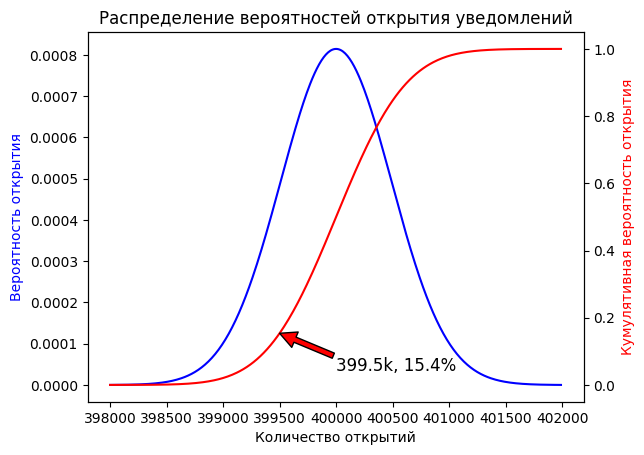

In [49]:
ax = plt.subplot()
x = np.arange(398_000, 402_000, 10)
ax.plot(x, push_distr.pdf(x), color="blue")
ax.set_ylabel("Вероятность открытия", color="blue")
ax.set_xlabel("Количество открытий")
ax2 = ax.twinx()
ax2.plot(x, push_distr.cdf(x), color="red")
ax2.set_ylabel("Кумулятивная вероятность открытия", color="red")
ax2.annotate(
    f"399.5k, {push_distr.cdf(399_500)*100:.1f}%",
    xy=(399_500, push_distr.cdf(399_500)),
    xytext=(400_000, 0.03),
    arrowprops=dict(facecolor="red"),
    fontsize=12,
    horizontalalignment="left",
    verticalalignment="bottom",
)
ax.set_title("Распределение вероятностей открытия уведомлений")

**Вывод**

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей 15.4%